In [1]:
# sorgt dafür, dass, wenn die letzte Zeile eine Zuweisung ist, deren Ergebnis auch ausgegeben wird
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# Im Quelltext wird dieses Verhalten mit dem Kommentar `#:` gekennzeichnet

In [2]:
import matplotlib.pyplot as plt

def show_book(figname):
    """
    Diese Funktion dient dazu Abbildungen abzuspeichern und den Name der Abbildung
    mit in den Quelltextschnipsel einzufügen
    """
    print(r"Siehe Abbildung §\ref{fig_XXX}§".replace("XXX", figname))
    plt.savefig(f"{figname}_snip.pdf")
    plt.show()

`begin general_rhs`

In [3]:
def rhs(x):
    ... # Berechne Ableitung dx
    return dx

`end general_rhs`

In [4]:
import numpy as np
from numpy import sin
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 18

`begin rhs_pendel1`

In [6]:
def rhs_pendel(t, x):
    g = 9.81
    l = 0.1

    dx1 = x[1]
    dx2 = -g/l*sin(x[0])
    dx = np.array([dx1, dx2])
    return dx

`end rhs_pendel1`

`begin euler_solver1`

In [7]:
def euler_solver(rhs, dt, Tend, x0):
    res_t = np.arange(0, Tend, dt)
    res_x = np.zeros((len(res_t), len(x0)))
    x = res_x[0, :] = x0
    for i, t in enumerate(res_t):
        x += dt*rhs(t, x)
        res_x[i, :] = x
    return res_t, res_x

`end euler_solver1`

`begin pendel_sim1`

Siehe Abbildung §\ref{fig_pendel_euler1}§


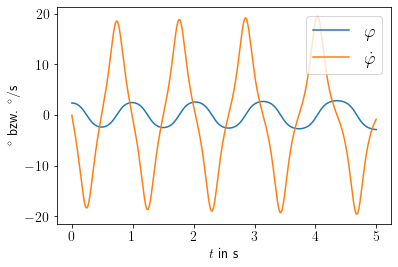

In [8]:
tt, xx = euler_solver(rhs_pendel, .001, 5, [np.pi*.75, 0])

plt.plot(tt, np.array(xx)[:, 0], label=r"$\varphi$")
plt.plot(tt, np.array(xx)[:, 1], label=r"$\dot \varphi$")
plt.xlabel(r"$t$ in s") #!
plt.ylabel(r"${}^\circ$ bzw. ${}^\circ$/s ") #!
plt.legend(loc="upper right") #!
show_book("pendel_euler1") #!

`end pendel_sim1`

`begin pendel_sim2`

In [9]:
np.set_printoptions(linewidth=60, precision=4)

In [10]:
from scipy.integrate import solve_ivp
# ...
x0 = [np.pi*0.75, 0]
tt = np.linspace(0, 5, 5000)
res = solve_ivp(rhs_pendel, (0, 5), x0, t_eval=tt)
#!plt.plot(res.t, res.y.T, label=r"$\varphi$")
# (Grafik kaum verändert -> nicht angezeigt)
# Grafik soll im Buch nicht wiederholt werden -> erst in nächster Zelle anzeigen #!

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 428
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.0000e+00, 1.0002e-03, 2.0004e-03, ..., 4.9980e+00,
       4.9990e+00, 5.0000e+00])
 t_events: None
        y: array([[  2.3562,   2.3562,   2.3561, ...,   1.3201,
          1.3064,   1.2926],
       [  0.    ,  -0.0694,  -0.1388, ..., -13.6377,
        -13.7326, -13.8271]])
 y_events: None

`end pendel_sim2`

In [11]:
res.t.shape

(5000,)

In [12]:
res.y.shape

(2, 5000)

Text(0, 0.5, '${}^\\circ$ bzw. ${}^\\circ$/s ')

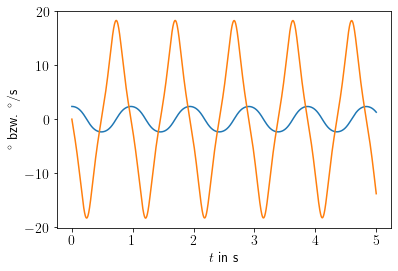

In [13]:
plt.plot(res.t, res.y.T) #!
plt.xlabel(r"$t$ in s") #!
plt.ylabel(r"${}^\circ$ bzw. ${}^\circ$/s ") #!

Bemerkung: Die Ergebnisse unterscheiden sich (leicht) auf Grund der numerischen Ungenauigkeit des Euler-Solvers.

Nebenrechnung für 

`begin fluchtzeit1`

In [14]:
import sympy as sp
a, t = sp.symbols("a, t")

x1_t = sp.Function("x1")(t)
initial_conditions = {x1_t.subs(t, 0): a}

print(sp.dsolve(x1_t.diff(t) - x1_t**2, x1_t, ics=initial_conditions))



Eq(x1(t), -1/(t - 1/a))


`end fluchtzeit1`

In [15]:
import copy

In [16]:
# Bisherige Plot-Einstellungen speichern (echte Kopie anlegen)
orig_plt_rcParams = copy.deepcopy(plt.rcParams)
pass 

In [17]:
# Plot-Einstellungen anpassen für zwei Grafiken nebeneinander
plt.rcParams['font.size'] = 18

plt.rcParams['figure.subplot.bottom'] = .265
plt.rcParams['figure.subplot.left'] = .09
plt.rcParams['figure.subplot.top'] = .995
plt.rcParams['figure.subplot.right'] = .995

`begin stabilitaet1`

Siehe Abbildung §\ref{fig_stabilitaet1}§


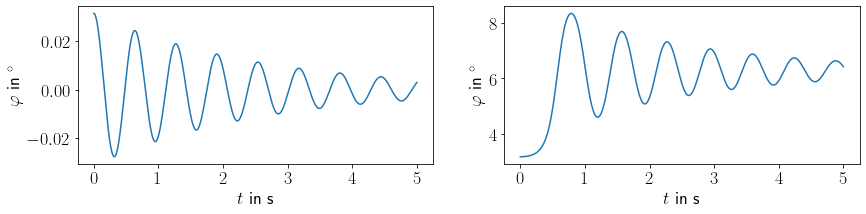

In [18]:
def rhs2(t, x, d):
    """
    RHS-Funktion für gedämpftes Pendel.
    Dämpfung d ist jetzt zusätzlicher Parameter
    """
    g = 9.81
    l = 0.1

    dx1 = x[1]
    dx2 = -g/l*sin(x[0]) - d*x[1]
    dx = np.array([dx1, dx2])
    return dx

delta_x1 = 0.01*np.pi

x_aw_0 = [delta_x1, 0]
x_aw_1 = [np.pi + delta_x1, 0]
tt = np.linspace(0, 5, 5000)
res0 = solve_ivp(rhs2, (0, 5), x_aw_0, t_eval=tt, args=(0.8,))
res1 = solve_ivp(rhs2, (0, 5), x_aw_1, t_eval=tt, args=(0.8,))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3));
ax1.plot(res.t, res0.y[0, :], label=r"$\varphi$")
ax2.plot(res.t, res1.y[0, :], label=r"$\varphi$")
# #!
ax1.set_xlabel("$t$ in s") #!
ax1.set_ylabel(r"$\varphi$ in ${}^\circ$") #!
ax2.set_xlabel("$t$ in s") #!
ax2.set_ylabel(r"$\varphi$ in ${}^\circ$") #!
# #!
show_book("stabilitaet1") #!

`end stabilitaet1`

In [19]:
plt.rcParams['figure.subplot.hspace'] = .3 # horizontalen Abstand anpassen

`begin stabilitaet2`

Siehe Abbildung §\ref{fig_stabilitaet2}§


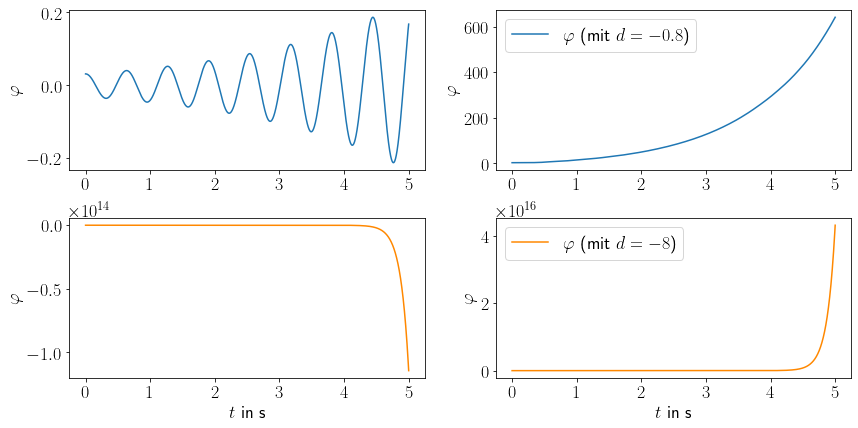

In [20]:
res0 = solve_ivp(rhs2, (0, 5), x_aw_0, t_eval=tt, args=(-0.8,))
res1 = solve_ivp(rhs2, (0, 5), x_aw_1, t_eval=tt, args=(-0.8,))
res2 = solve_ivp(rhs2, (0, 5), x_aw_0, t_eval=tt, args=(-8,))
res3 = solve_ivp(rhs2, (0, 5), x_aw_1, t_eval=tt, args=(-8,))

# Plotten
# ...
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 7)); #!
ax0.plot(res.t, res0.y[0, :], label=r"$\varphi$") #!
ax1.plot(res.t, res1.y[0, :], label=r"$\varphi$ (mit $d=-0.8$)")  #!
ax2.plot(res.t, res2.y[0, :], color="#f80", label=r"$\varphi$")  #!
ax3.plot(res.t, res3.y[0, :], color="#f80", label=r"$\varphi$ (mit $d=-8$)")  #!
ax0.set_ylabel(r"$\varphi$") #!
ax1.set_ylabel(r"$\varphi$") #!
ax2.set_xlabel("$t$ in s") #!
ax2.set_ylabel(r"$\varphi$") #!
ax3.set_xlabel("$t$ in s") #!
ax3.set_ylabel(r"$\varphi$") #!
ax1.legend() #!
ax3.legend() #!
show_book("stabilitaet2") #!

`end stabilitaet2`

`begin stabilitaet3`

In [21]:
# Pendelgeschwindigkeit nach 5s in rad/s
omega = res3.y[1, -1]

3.453009529927373e+17

In [22]:
# Umfangsgeschwindigkeit (bei l=0.1m)
# in Relation zur Lichtgeschwindigkeit
c = 3e9
omega * 0.1 / c

11510031.766424576

`end stabilitaet3`

In [23]:
# Matrix-Exponetialfunktion
import scipy as sc
print(sc.linalg.expm.__doc__)


    Compute the matrix exponential using Pade approximation.

    Parameters
    ----------
    A : (N, N) array_like or sparse matrix
        Matrix to be exponentiated.

    Returns
    -------
    expm : (N, N) ndarray
        Matrix exponential of `A`.

    References
    ----------
    .. [1] Awad H. Al-Mohy and Nicholas J. Higham (2009)
           "A New Scaling and Squaring Algorithm for the Matrix Exponential."
           SIAM Journal on Matrix Analysis and Applications.
           31 (3). pp. 970-989. ISSN 1095-7162

    Examples
    --------
    >>> from scipy.linalg import expm, sinm, cosm

    Matrix version of the formula exp(0) = 1:

    >>> expm(np.zeros((2,2)))
    array([[ 1.,  0.],
           [ 0.,  1.]])

    Euler's identity (exp(i*theta) = cos(theta) + i*sin(theta))
    applied to a matrix:

    >>> a = np.array([[1.0, 2.0], [-1.0, 3.0]])
    >>> expm(1j*a)
    array([[ 0.42645930+1.89217551j, -2.13721484-0.97811252j],
           [ 1.06860742+0.48905626j, -1.71075

`begin stabilitaet4`

In [24]:
x1, x2 = xx =  sp.symbols("x1, x2")
g, l, d = params = sp.symbols("g, l, d")

In [25]:
# g und l schon numerisch vorgeben (mit 9.81 ≈ 10)
#g, l = 10, 0.1

f_symb = sp.Matrix([x2, -g/l*sp.sin(x1) - d*x2])

Matrix([
[                 x2],
[-d*x2 - g*sin(x1)/l]])

In [26]:
# Jacobi-Matrizen für die beiden Ruhelagen bestimmen:
# untere RL: x1 = 0
A0 = f_symb.jacobian(xx).subs(x1, 0)

Matrix([
[   0,  1],
[-g/l, -d]])

In [27]:
# obere RL: x1 = pi
A1 = f_symb.jacobian(xx).subs(x1, sp.pi)

Matrix([
[  0,  1],
[g/l, -d]])

In [28]:
# Eigenwerte (jeweils mit Vielfachheit 1)
A0.eigenvals()

{-d/2 - sqrt(l*(d**2*l - 4*g))/(2*l): 1,
 -d/2 + sqrt(l*(d**2*l - 4*g))/(2*l): 1}

In [29]:
A1.eigenvals()

{-d/2 - sqrt(l*(d**2*l + 4*g))/(2*l): 1,
 -d/2 + sqrt(l*(d**2*l + 4*g))/(2*l): 1}

`end stabilitaet4`

In [30]:
# Originale Plot-Einstellungen reaktivieren
plt.rcParams.update(orig_plt_rcParams)
pass 

## Regelungstechnik (Beispiel: Tempomat)

`begin tempomat1`

In [31]:
m = 1000 # Masse [kg] 
cw = 1 # Koeff. Luftwiderstand

FH = 0 # Hangabtriebskraft

v_soll = 30 # Sollgeschw. [m/s]
Kp = 100 # Reglerverstärkung

def controller_p(w, x):
    """
    :param w:    Sollwert
    :param x:    Zustandsvektor (array)
    """
    e = w - x[0]  # Regeldifferenz 
    
    return Kp*e # einfacher Proportionalregler

def rhs_vehicle(t, x):
    "Rechte Seite der System-DGL"
    
    u = controller_p(v_soll, x)
    
    xdot1 = 1/m * (u + FH - cw*x[0]**2)
    return np.array([xdot1])

`end tempomat1`

In [32]:
from scipy.integrate import solve_ivp

`begin tempomat2`

Siehe Abbildung §\ref{fig_tempomat_result1}§


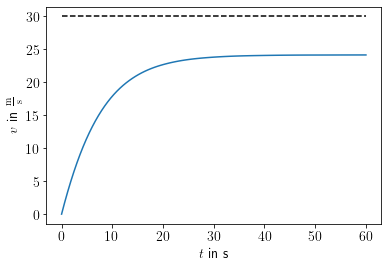

In [33]:
# Vorbereitung
x0 = np.array([0])  # Anfangszustand (Stillstand)
Tend = 60
tt = np.linspace(0, Tend, 100)

# Simulation
res = solve_ivp(rhs_vehicle, (0, Tend), x0, t_eval=tt)

# Visualisierung
plt.plot(res.t, res.t*0 + v_soll, "k--")
plt.plot(res.t, res.y.T)
plt.xlabel(r"$t$ in s") #!
plt.ylabel(r"$v$ in $\frac{\mathrm{m}}{\mathrm{s}}$") #!
show_book("tempomat_result1") #!

`end tempomat2`

In [34]:
# Endwert
res.y[0, -1]

24.156995227699134

`begin tempomat3`

Siehe Abbildung §\ref{fig_tempomat_result2}§


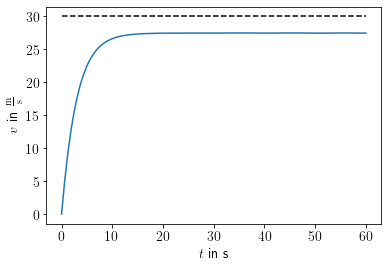

In [35]:
Kp = 300

# Simulieren und Plotten ...
res = solve_ivp(rhs_vehicle, (0, Tend), x0, t_eval=tt) #!
# #!
plt.plot(res.t, res.t*0 + v_soll, "k--") #!
plt.plot(res.t, res.y.T) #!
plt.xlabel(r"$t$ in s") #!
plt.ylabel(r"$v$ in $\frac{\mathrm{m}}{\mathrm{s}}$") #!
show_book("tempomat_result2") #!

`end tempomat3`

`begin tempomat4`

Siehe Abbildung §\ref{fig_tempomat_result3}§


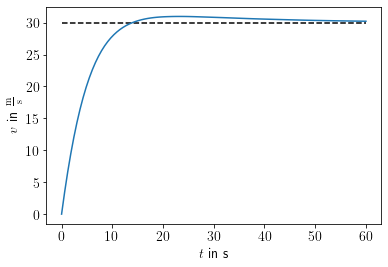

In [36]:
Kp = 200
Ki = 10

def controller_pi(w, x):
    """
    :param w:    Sollwert
    :param x:    Zustandsvektor (array)
    """
    e = w - x[0]  # Regeldifferenz 
    e_int = x[1]  # integrierte Regeldifferenz
    
    u = Kp*e + Ki*e_int # PI-Regler
    
    # u und e zurückgeben
    return u, e

def rhs_vehicle2(t, x):
    "Rechte Seite der System-DGL (inkl. I-Anteil)"
    
    u, e = controller_pi(v_soll, x)
    
    xdot1 = 1/m * (u + FH - cw*x[0]**2)
    xdot2 = e
    return np.array([xdot1, xdot2])

# neuer Anfangszustand shape=(2,)
x0 = np.array([0, 0])

res = solve_ivp(rhs_vehicle2, (0, Tend), x0, t_eval=tt)

plt.plot(res.t, res.t*0 + v_soll, "k--")
plt.plot(res.t, res.y[0, :])
plt.xlabel(r"$t$ in s") #!
plt.ylabel(r"$v$ in $\frac{\mathrm{m}}{\mathrm{s}}$") #!
show_book("tempomat_result3") #!

`end tempomat4`

`begin tempomat5`

In [37]:
def rhs_vehicle3(t, x):
    "System-DGL-rhs (inkl. I-Anteil und Störsprung)"
    
    u, e = controller_pi(v_soll, x)
    
    # FH ist globale Variable (extern vorgegebener Wert)
    FH_local = FH 
    
    if t > 20:
        FH_local = -500
    
    xdot1 = 1/m * (u + FH_local - cw*x[0]**2)
    xdot2 = e
    return np.array([xdot1, xdot2])

`end tempomat5`

`begin tempomat6`

In [38]:
# stationärer Wert für den I-Anteil
x2_stat = v_soll**2/Ki
# stationärer Anfangszustand für FH=0
x0 = np.array([v_soll, x2_stat])

array([30., 90.])

`end tempomat6`

`begin tempomat7`

Siehe Abbildung §\ref{fig_tempomat_result4}§


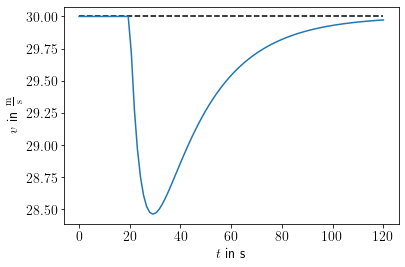

In [39]:
# Durchführung der Simulation
res = solve_ivp(rhs_vehicle3, (0, Tend*2), x0, t_eval=tt*2, max_step=0.1)

plt.plot(res.t, res.t*0 + v_soll, "k--")
plt.plot(res.t, res.y[0, :])
plt.xlabel(r"$t$ in s") #!
plt.ylabel(r"$v$ in $\frac{\mathrm{m}}{\mathrm{s}}$") #!
show_book("tempomat_result4") #!

`end tempomat7`